/checkpoint/apratik/jobs/active_vision/pipeline/instance_det/apartment_0/straightline/no_noise/13-11-2021/11:31:52/code/output_droid
globber 47 metrics


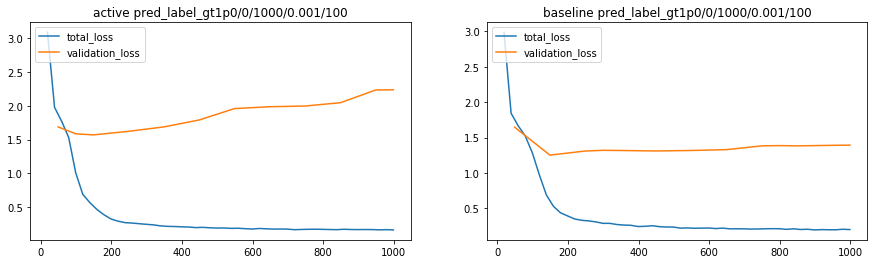

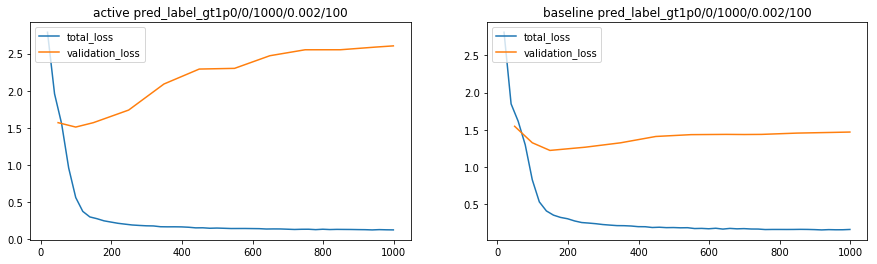

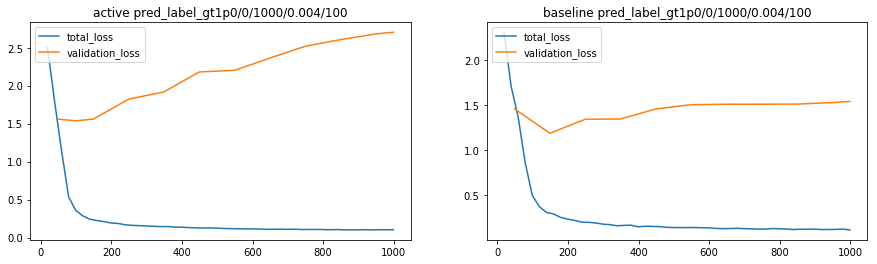

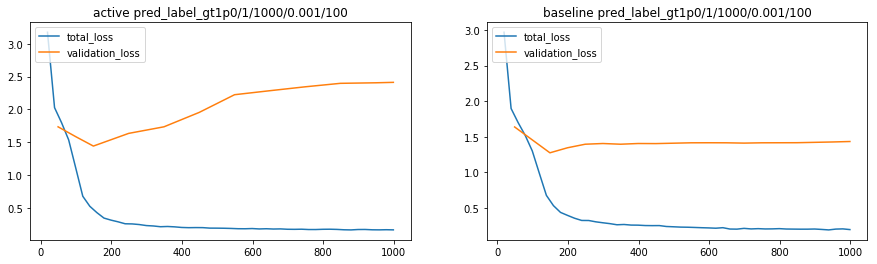

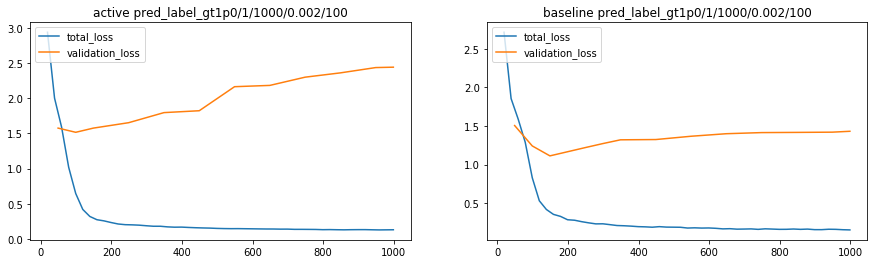

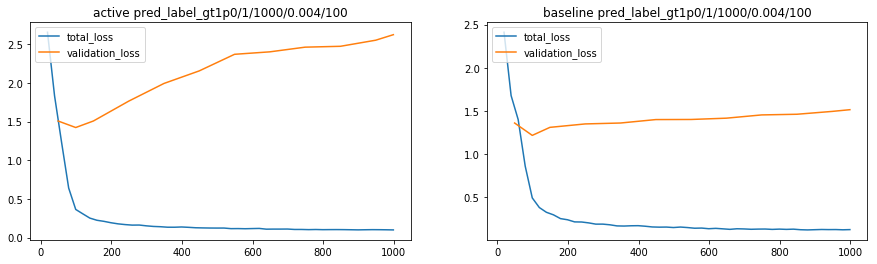

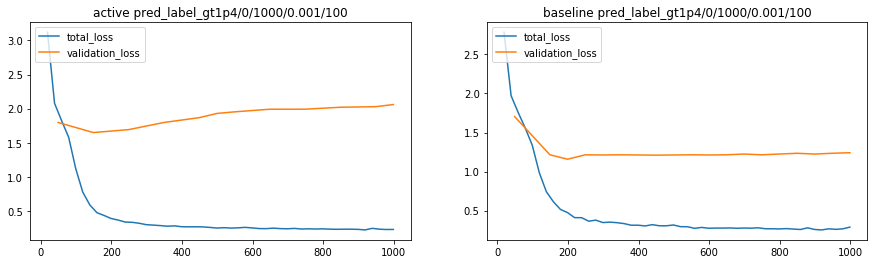

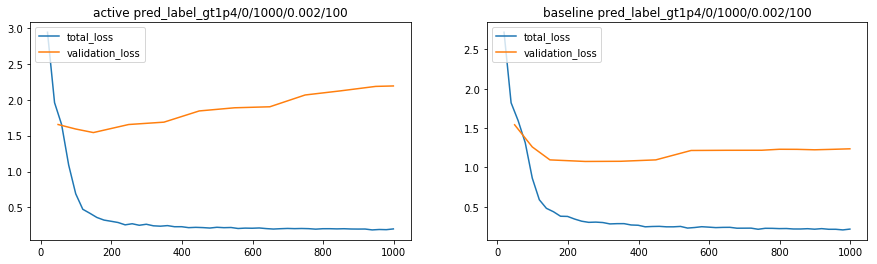

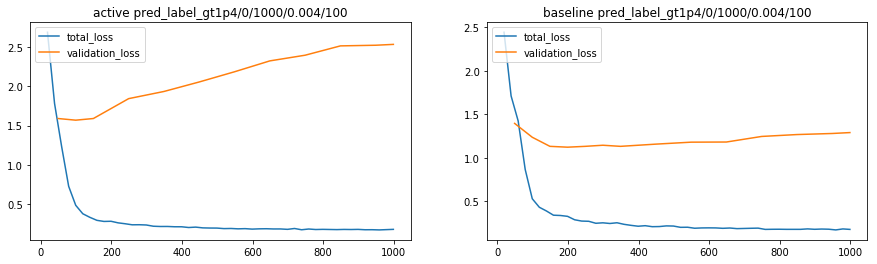

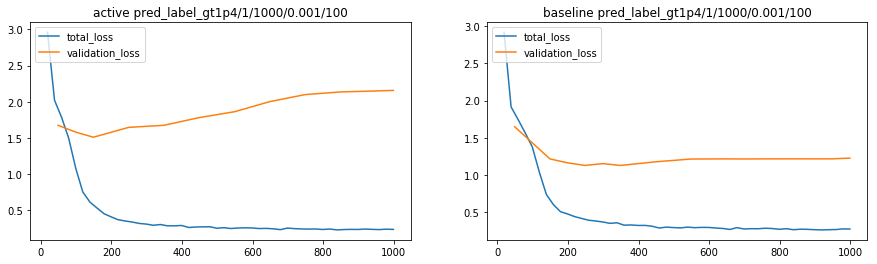

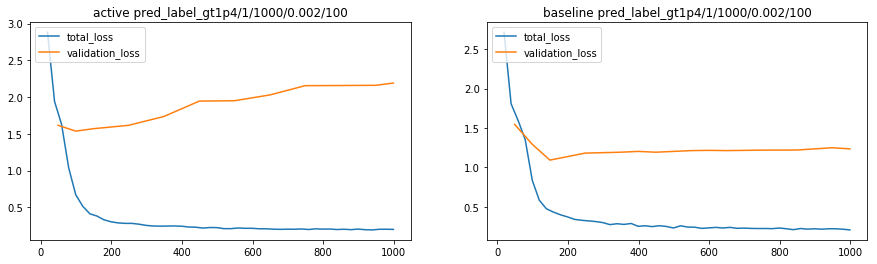

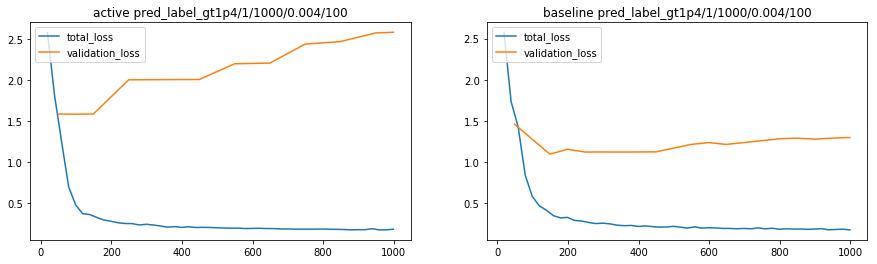

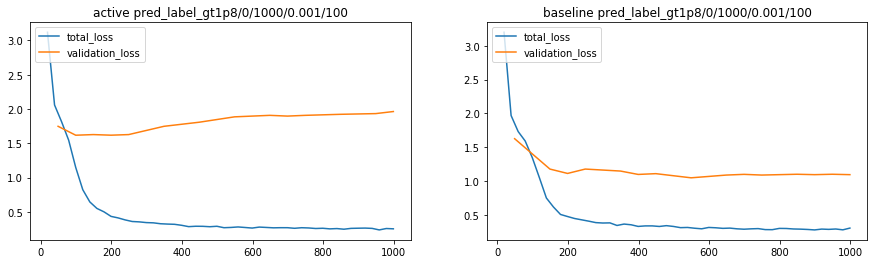

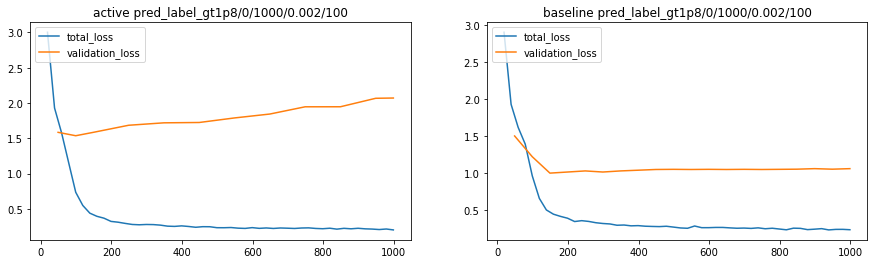

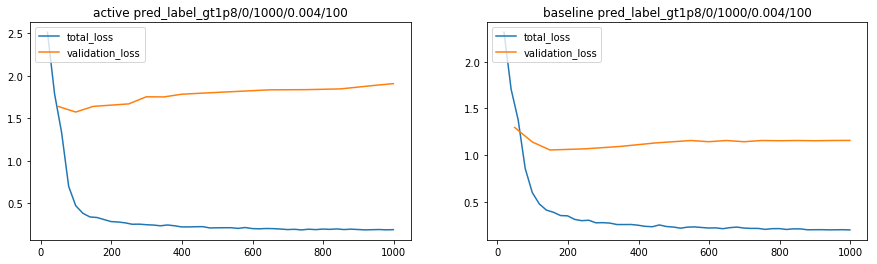

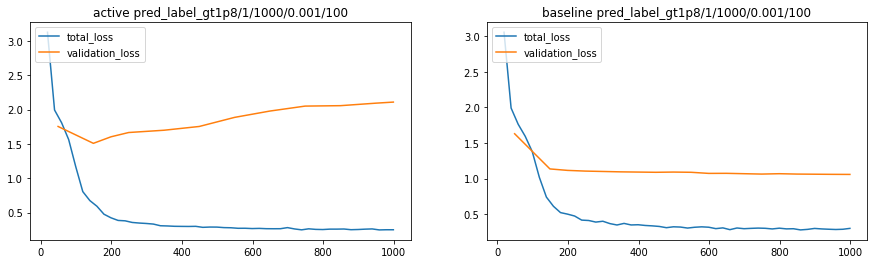

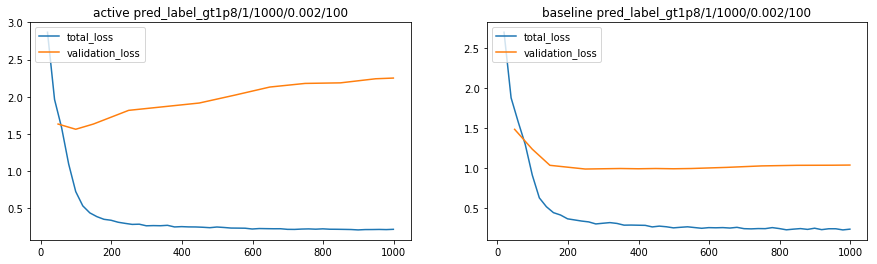

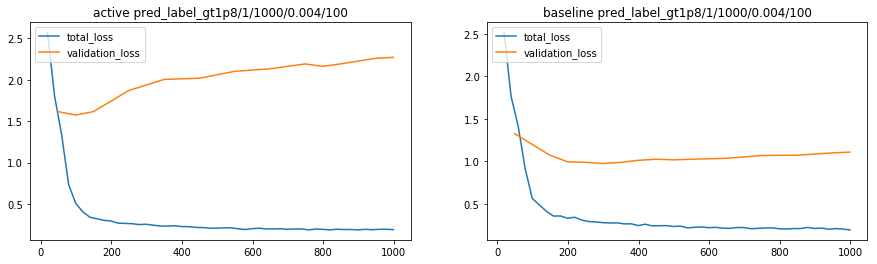

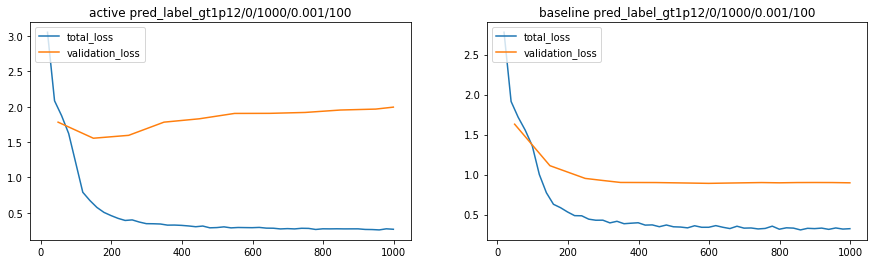

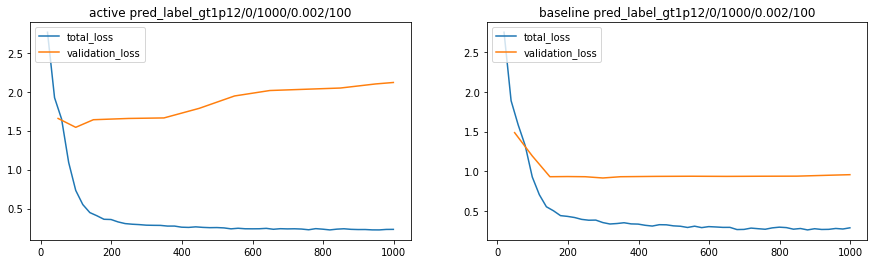

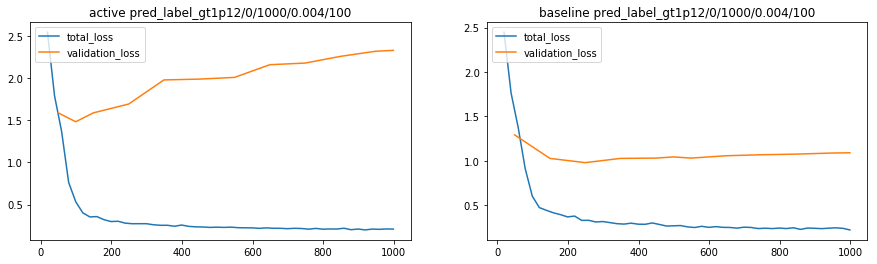

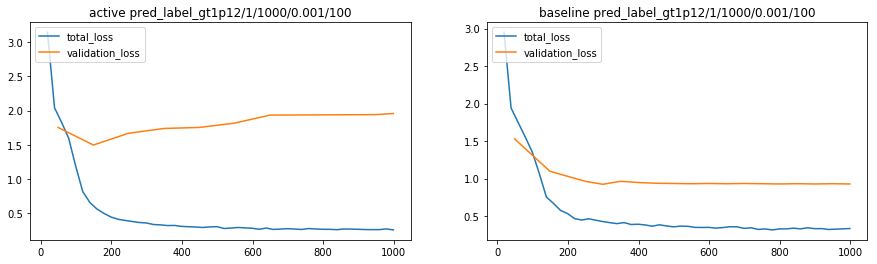

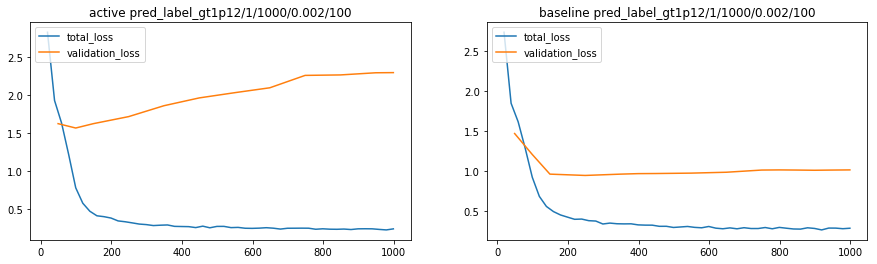

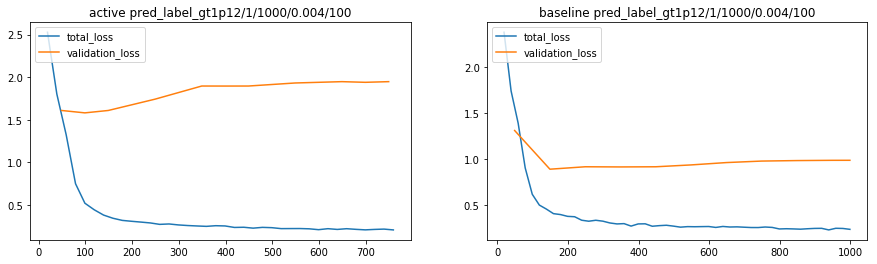

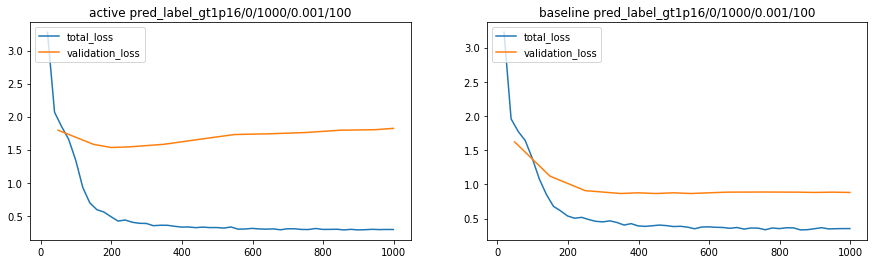

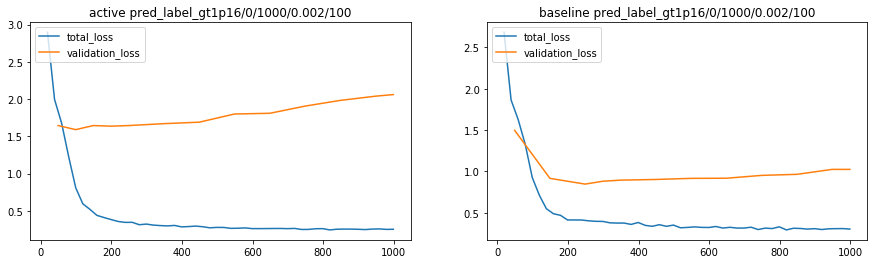

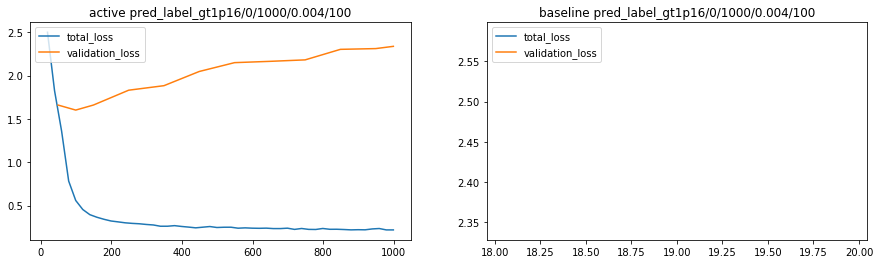

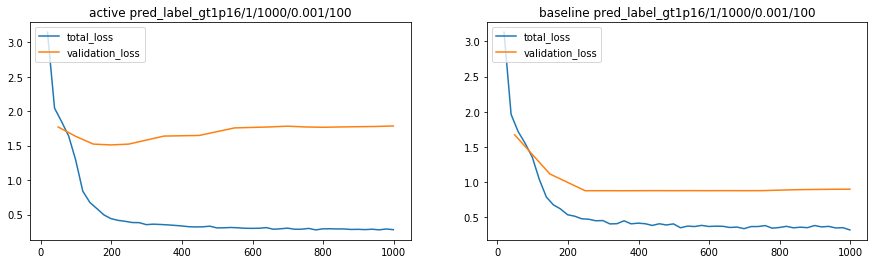

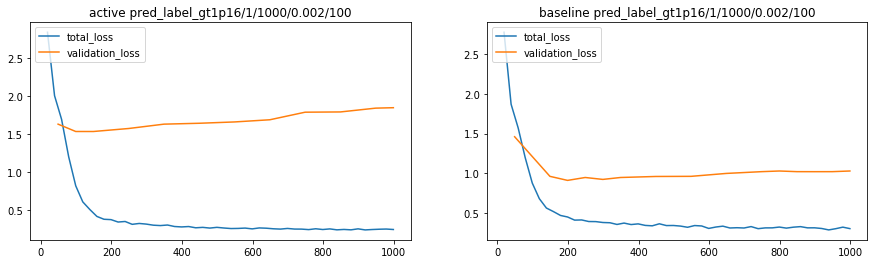

FileNotFoundError: [Errno 2] No such file or directory: '/checkpoint/apratik/jobs/active_vision/pipeline/instance_det/apartment_0/default/no_noise/13-11-2021/11:31:27/code/output_droid/pred_label_gt1p16/1/1000/0.004/100/metrics.json'

In [4]:
import json
import matplotlib.pyplot as plt
import os
import glob

# experiment_folder = os.path.join(job_dir, 'code/output_droid/pred_label_gt1p0/0/1000/0.001/100')

def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

def plot(x, def_dir):
    experiment_metrics = load_json_arr(x)
    title = x.split('/')[-6:-1]
    
    def_metrics = os.path.join(def_dir, 'code/output_droid', "/".join(title), 'metrics.json')
    if not def_metrics:
        print(f'{def_metrics} does not exist!!')
        
    dem = load_json_arr(def_metrics)
    
    fig, axs = plt.subplots(1, 2, figsize=(15,4))
    
    axs[0].plot(
        [x['iteration'] for x in experiment_metrics if 'total_loss' in x], 
        [x['total_loss'] for x in experiment_metrics if 'total_loss' in x])
    axs[0].plot(
        [x['iteration'] for x in experiment_metrics if 'validation_loss' in x], 
        [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x])
    axs[0].legend(['total_loss', 'validation_loss'], loc='upper left')
    axs[0].set_title('active ' + "/".join(title))
    
    axs[1].plot(
        [x['iteration'] for x in dem if 'total_loss' in x], 
        [x['total_loss'] for x in dem if 'total_loss' in x])
    axs[1].plot(
        [x['iteration'] for x in dem if 'validation_loss' in x], 
        [x['validation_loss'] for x in dem if 'validation_loss' in x])
    axs[1].legend(['total_loss', 'validation_loss'], loc='upper left')
    axs[1].set_title('baseline ' + "/".join(title))
    
    plt.show()
        
def main_fn(job_dir_act, job_dir_def):
    metrics_dir = os.path.join(job_dir_act, 'code/output_droid')
    print(metrics_dir)
    metrics = glob.glob(metrics_dir + '/**/metrics.json', recursive=True)
    print(f'globber {len(metrics)} metrics')
    for m in metrics:
        plot(m, job_dir_def)
    
        
job_dir_a = '/checkpoint/apratik/jobs/active_vision/pipeline/instance_det/apartment_0/straightline/no_noise/13-11-2021/11:31:52'
job_dir_b = '/checkpoint/apratik/jobs/active_vision/pipeline/instance_det/apartment_0/default/no_noise/13-11-2021/11:31:27'

main_fn(job_dir_a, job_dir_b)